# CLUSTERING

**KMeans**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly.graph_objects as go




from collections import defaultdict
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score

In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/training_cleaned.csv')
df.drop(df.columns[0], axis=1, inplace=True)
df.head()

,RefId,IsBadBuy,PurchDate,Auction,VehicleAge,Make,Model,SubModel,Color,Transmission,WheelTypeID,VehOdo,Nationality,Size,TopThreeAmericanName,BYRNO,VehBCost,IsOnlineSale,WarrantyCost,Region,IsBase,AuctionAVG,RetailAVG,Trend
0,326,1,10/25/2010,ADESA,2,KIA,SPECTRA,MEDIUM,BLUE,AUTO,2.0,61184,OTHER ASIAN,MEDIUM,OTHER,5546,6100.0,0,533,SAT,NO,7128.5,10300.0,-0.012594
1,42991,0,5/27/2009,MANHEIM,3,DODGE,STRATUS V6 2.7L V6 M,MEDIUM,SILVER,AUTO,2.0,92383,AMERICAN,MEDIUM,CHRYSLER,99750,4000.0,0,1630,SAT,NO,5970.5,6948.0,0.000000
2,55273,0,3/18/2010,OTHER,2,DODGE,CALIBER,MEDIUM,BLACK,AUTO,2.0,45965,AMERICAN,MEDIUM,CHRYSLER,99761,7500.0,0,693,WSC,NO,8061.5,11199.0,-0.022092
3,29058,0,6/8/2009,OTHER,4,FORD,FREESTAR FWD V6 3.9L,VAN,BROWN,AUTO,2.0,80169,AMERICAN,VAN,FORD,99761,4725.0,0,1633,MNT,NO,5737.5,6696.5,0.000000
4,34991,0,3/4/2009,MANHEIM,4,CHRYSLER,TOWN & COUNTRY FWD V,VAN,BLUE,AUTO,1.0,77372,AMERICAN,VAN,CHRYSLER,20833,5670.0,0,1623,WSC,YES,6061.0,7046.0,0.004692


In [0]:
df_clus = df.drop(columns=['RefId',
        'PurchDate',
        'IsBadBuy',
        'Auction',
        'Make',
        'Model',
        'WheelTypeID',
        'Nationality',
        'Size',
        'Color',
        'Transmission',
        'BYRNO',
        'TopThreeAmericanName',
        'SubModel',
        'VehicleAge',
        'IsOnlineSale',
        'Region',
        'IsBase',])
df_clus.dropna(inplace=True)
len(df_clus)
df_clus.head()

,VehOdo,VehBCost,WarrantyCost,AuctionAVG,RetailAVG,Trend
0,61184,6100.0,533,7128.5,10300.0,-0.012594
1,92383,4000.0,1630,5970.5,6948.0,0.000000
2,45965,7500.0,693,8061.5,11199.0,-0.022092
3,80169,4725.0,1633,5737.5,6696.5,0.000000
4,77372,5670.0,1623,6061.0,7046.0,0.004692


In [0]:
df_1 = df_clus[['VehOdo', 'VehBCost', 'Trend']]
df_2 = df_clus[['VehOdo', 'VehBCost', 'Trend', 'AuctionAVG', 'RetailAVG']]
df_3 = df_clus[['AuctionAVG', 'RetailAVG', 'VehBCost']]
df_4 = df_clus[['WarrantyCost', 'Trend', 'VehBCost']]
df_5 = df_clus[['WarrantyCost', 'VehOdo', 'VehBCost']]
df_6 = df_clus[['AuctionAVG', 'VehOdo', 'VehBCost']]

data_frames = [df_1, df_2, df_3, df_4, df_5, df_6]

## K-Means with MinMax


In [0]:
scaler = MinMaxScaler()
z_scaled_df = []
for x in data_frames:
  z_scaled_df.append(scaler.fit_transform(x.values))

In [0]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [0]:
results = {}
for i, x in enumerate(z_scaled_df):
  results[str(i)] = []

for i, x in enumerate(z_scaled_df):
  for k in range(2, 11):
    results[str(i)].append(KMeans(n_clusters=k).fit(x))

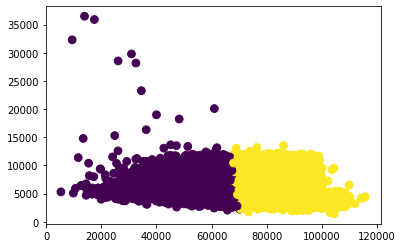

In [0]:
plt.scatter(df_clus['VehOdo'], df_clus['VehBCost'], 
            c=results['1'][0].labels_, s=60)

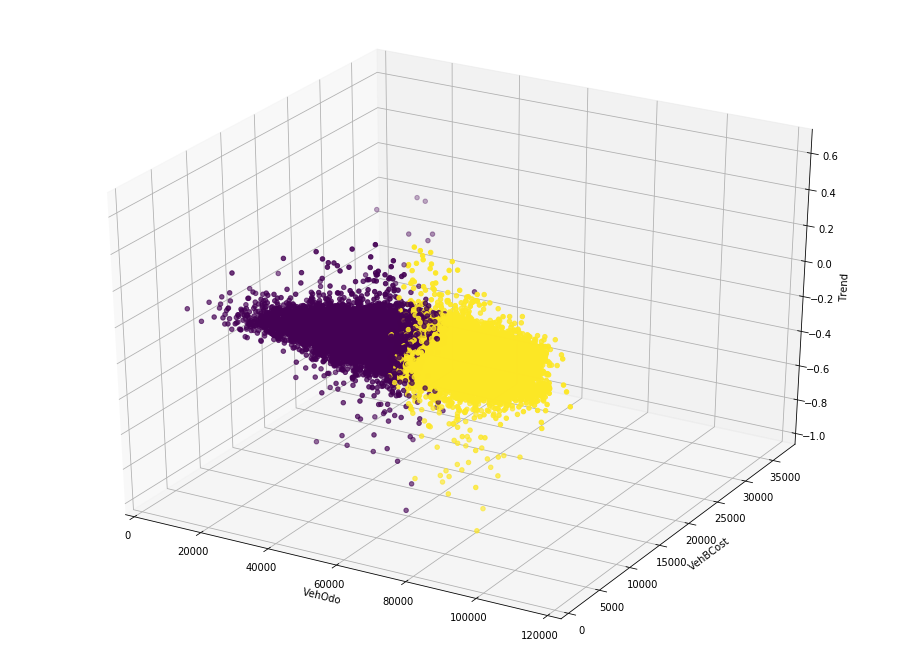

In [0]:
x = 'VehOdo'
y = 'VehBCost'
z = 'Trend'

fig = plt.figure(figsize=(16,12))
ax = fig.gca(projection='3d')
ax.scatter(data_frames[0][x],
           data_frames[0][y],
           data_frames[0][z],
           c=results['0'][0].labels_, marker='o')
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)
plt.show()

In [0]:
fig = go.Figure(data=[go.Scatter3d(
    x=data_frames[0][x],
    y=data_frames[0][y],
    z=data_frames[0][z],
    mode='markers',
    marker=dict(
        size=2,
        color=results['0'][3].labels_,                # set color to an array/list of desired values
        #colorscale='Viridis',   # choose a colorscale
        opacity=1
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                 scene = dict(
                     xaxis_title= x,
                     yaxis_title= y,
                     zaxis_title= z)
                 )
fig.show()

547.9697437035443
384.95320893189404
320.8673074772881
278.72949210513644
246.67167336828587
224.49031748509896
206.05495941176832
191.8250488670541
180.92459108734167


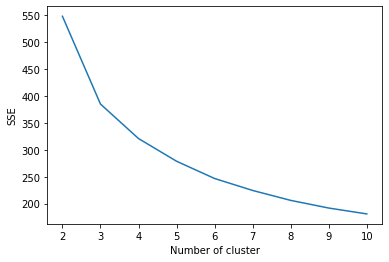

1207.425900172968
823.0166893583164
694.629618176685
600.3326751508836
525.7455090784138
473.83123864637815
437.5397980698818
409.1784958133875
386.2767674062875


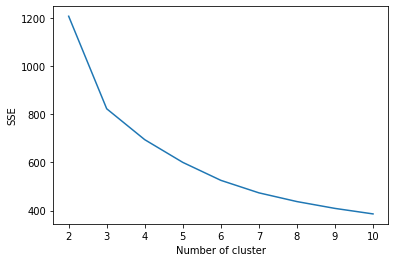

318.70693517755825
201.05736733228983
150.40967788937442
123.08457766050752
109.32663553560124
99.6128472625008
91.94409547482476
85.23572803155393
79.75103741614336


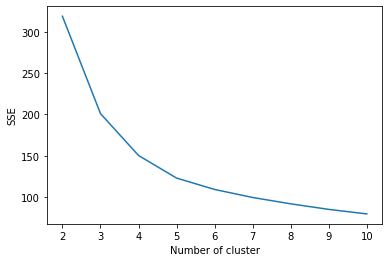

396.4916017276338
317.2414503438778
250.72460975975451
212.02742190253215
185.58878771706182
169.8488389371577
155.56374640134462
144.7958895460864
135.2840858910847


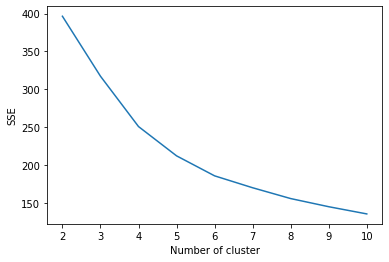

823.5317657267078
638.8090976231568
520.1978202072329
453.0776934824154
395.4971647978108
354.6331189847483
321.841728858354
299.2660200115632
279.0078659413515


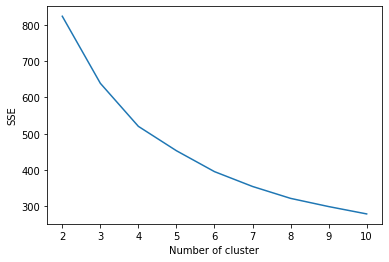

758.8848045666133
556.4049858586753
430.54094939207766
359.8580808987241
314.16510668594805
280.58497410386434
249.60927264736307
227.44636338299898
208.83946035371432


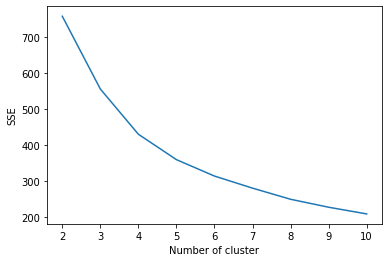

In [0]:
sse = {}

for i, e in enumerate(z_scaled_df):
  sse[str(i)] = {}

for i, e in enumerate(z_scaled_df):
  for k in range(2, 11):
      sse[str(i)][str(k)] = results[str(i)][k - 2].inertia_# Inertia: Sum of distances of samples to their closest cluster center
  plt.figure()

  plt.plot(list(sse[str(i)].keys()), list(sse[str(i)].values()))

  plt.xlabel("Number of cluster")

  plt.ylabel("SSE")

  plt.show()

In [0]:
silu = {}

for idx, e in enumerate(z_scaled_df):
  silu[str(idx)] = []

for idx, e in enumerate(z_scaled_df):
  for i in range(5, 7):
    silu[str(idx)].append(silhouette_score(z_scaled_df[idx], results[str(idx)][i-2].labels_, metric = 'euclidean'))
  print("end data frame ", idx)

end data frame  0
end data frame  1
end data frame  2
end data frame  3
end data frame  4
end data frame  5


In [0]:
print(sse['0']['2'])
print(round(sse['0']['2']))

547.9697437035443
548.0


In [0]:
import plotly.graph_objects as go

headerColor = 'grey'
rowEvenColor = 'lightgrey'
rowOddColor = 'white'

fig = go.Figure(data=[go.Table(
  header=dict(
    values=['','<b>k = 5 => <SSE, Silohuette></b>','<b>k = 6 => <SSE, Silohuette></b>'],
    line_color='darkslategray',
    fill_color=headerColor,
    align=['left','center'],
    font=dict(color='white', size=12)
  ),
  cells=dict(
    values=[
      ['DF1', 'DF2', 'DF3', 'DF4', 'DF5', 'DF6'],
      ["<" + str(round(sse['0']['5'])) + ", %.3f" % silu['0'][0] + ">",
       "<" + str(round(sse['1']['5'])) + ", %.3f" % silu['1'][0] + ">",
       "<" + str(round(sse['2']['5'])) + ", %.3f" % silu['2'][0] + ">",
       "<" + str(round(sse['3']['5'])) + ", %.3f" % silu['3'][0] + ">",
       "<" + str(round(sse['4']['5'])) + ", %.3f" % silu['4'][0] + ">",
       "<" + str(round(sse['5']['5'])) + ", %.3f" % silu['5'][0] + ">",],
      ["<" + str(round(sse['0']['6'])) + ", %.3f" % silu['0'][1] + ">",
       "<" + str(round(sse['1']['6'])) + ", %.3f" % silu['1'][1] + ">",
       "<" + str(round(sse['2']['6'])) + ", %.3f" % silu['2'][1] + ">",
       "<" + str(round(sse['3']['6'])) + ", %.3f" % silu['3'][1] + ">",
       "<" + str(round(sse['4']['6'])) + ", %.3f" % silu['4'][1] + ">",
       "<" + str(round(sse['5']['6'])) + ", %.3f" % silu['5'][1] + ">",]],
    line_color='darkslategray',
    # 2-D list of colors for alternating rows
    fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor]*5],
    align = ['left', 'center'],
    font = dict(color = 'darkslategray', size = 11)
    ))
])

fig.show()